# 課程目標

利用Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響

# 範例重點: 
    
    模型架構的層數
    
    使用何種LOSS function

# 導入必要的libray

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
#np.random.seed(10)的作用：使得隨機數據可預測

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras CIFAR10 Dataset, 並分成Training 與 Test set
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化, 並設定 data array 為浮點數
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE, 並查看維度資訊
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
# 宣告採用序列模型
model = Sequential()

In [8]:
#卷積層1與池化層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
#卷積層2與池化層2

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層3與池化層3

In [13]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
#卷積層4與池化層4

In [15]:
model.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())


In [17]:
#建立全網路連接層
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

In [18]:
#建立輸出層
model.add(Dense(10, activation='softmax'))

In [19]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         295168    
__________

# 載入之前訓練的模型

In [20]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [21]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 136s 4ms/step - loss: 1.6063 - acc: 0.4033 - val_loss: 1.2925 - val_acc: 0.5196
Epoch 2/12
37500/37500 [==============================] - 127s 3ms/step - loss: 1.1592 - acc: 0.5796 - val_loss: 1.0325 - val_acc: 0.6331
Epoch 3/12
37500/37500 [==============================] - 128s 3ms/step - loss: 0.9283 - acc: 0.6675 - val_loss: 0.9172 - val_acc: 0.6782
Epoch 4/12
37500/37500 [==============================] - 130s 3ms/step - loss: 0.7704 - acc: 0.7285 - val_loss: 0.8348 - val_acc: 0.7096
Epoch 5/12
37500/37500 [==============================] - 123s 3ms/step - loss: 0.6495 - acc: 0.7699 - val_loss: 0.8034 - val_acc: 0.7237
Epoch 6/12
37500/37500 [==============================] - 127s 3ms/step - loss: 0.5386 - acc: 0.8121 - val_loss: 0.8259 - val_acc: 0.7240
Epoch 7/12
37500/37500 [==============================] - 110s 3ms/step - 

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

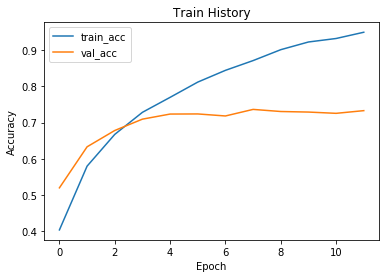

In [24]:
show_train_history('acc','val_acc')

In [26]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [27]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history2=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 85s 2ms/step - loss: 0.0028 - acc: 0.9823 - val_loss: 0.0416 - val_acc: 0.7411
Epoch 2/12
37500/37500 [==============================] - 83s 2ms/step - loss: 0.0024 - acc: 0.9851 - val_loss: 0.0409 - val_acc: 0.7455
Epoch 3/12
37500/37500 [==============================] - 86s 2ms/step - loss: 0.0022 - acc: 0.9871 - val_loss: 0.0408 - val_acc: 0.7434
Epoch 4/12
37500/37500 [==============================] - 92s 2ms/step - loss: 0.0020 - acc: 0.9878 - val_loss: 0.0410 - val_acc: 0.7445
Epoch 5/12
37500/37500 [==============================] - 109s 3ms/step - loss: 0.0019 - acc: 0.9888 - val_loss: 0.0408 - val_acc: 0.7454
Epoch 6/12
37500/37500 [==============================] - 104s 3ms/step - loss: 0.0018 - acc: 0.9898 - val_loss: 0.0406 - val_acc: 0.7468
Epoch 7/12
37500/37500 [==============================] - 109s 3ms/step - loss: 0.0017 - acc: 0.9904 - val_loss: 0.0406 - val_

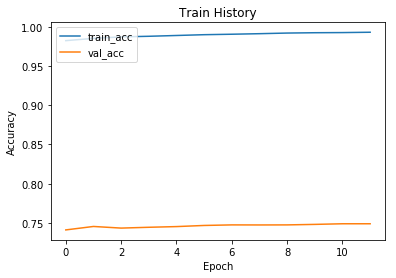

In [28]:
plt.plot(train_history2.history['acc'])
plt.plot(train_history2.history['val_acc'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()

In [29]:
# 宣告採用序列模型
model2 = Sequential()
model2.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=256, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
#建立神經網路(平坦層、隱藏層、輸出層)
model2.add(Flatten())
#建立全網路連接層
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
#建立輸出層
model2.add(Dense(10, activation='softmax'))
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 256)         295168    
__________

In [31]:
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [34]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history3=model2.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 117s 3ms/step - loss: 0.3253 - acc: 0.9000 - val_loss: 0.3250 - val_acc: 0.9000
Epoch 2/12
37500/37500 [==============================] - 100s 3ms/step - loss: 0.3248 - acc: 0.9000 - val_loss: 0.3246 - val_acc: 0.9000
Epoch 3/12
37500/37500 [==============================] - 97s 3ms/step - loss: 0.3244 - acc: 0.9000 - val_loss: 0.3242 - val_acc: 0.9000
Epoch 4/12
37500/37500 [==============================] - 97s 3ms/step - loss: 0.3241 - acc: 0.9000 - val_loss: 0.3239 - val_acc: 0.9000
Epoch 5/12
37500/37500 [==============================] - 106s 3ms/step - loss: 0.3237 - acc: 0.9000 - val_loss: 0.3235 - val_acc: 0.9000
Epoch 6/12
37500/37500 [==============================] - 121s 3ms/step - loss: 0.3233 - acc: 0.9000 - val_loss: 0.3230 - val_acc: 0.9000
Epoch 7/12
37500/37500 [==============================] - 112s 3ms/step - loss: 0.3228 - acc: 0.9000 - val_loss: 0.3224 - va

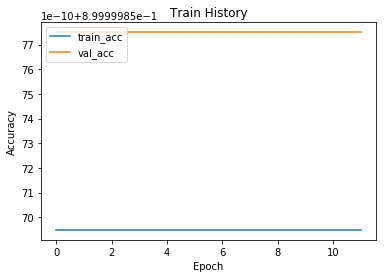

In [35]:
plt.plot(train_history3.history['acc'])
plt.plot(train_history3.history['val_acc'])
plt.title('Train History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')
plt.show()